<a href="https://colab.research.google.com/github/ViniciusPrincipe/BitcoinPrediction-LSTM/blob/main/BtcLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import sklearn.metrics as sk

In [2]:
df = pd.read_csv('/content/btc.csv')

dfLimpo = df['Close'].values
dfLimpo = dfLimpo[::-1]

In [3]:
len(dfLimpo)

1273

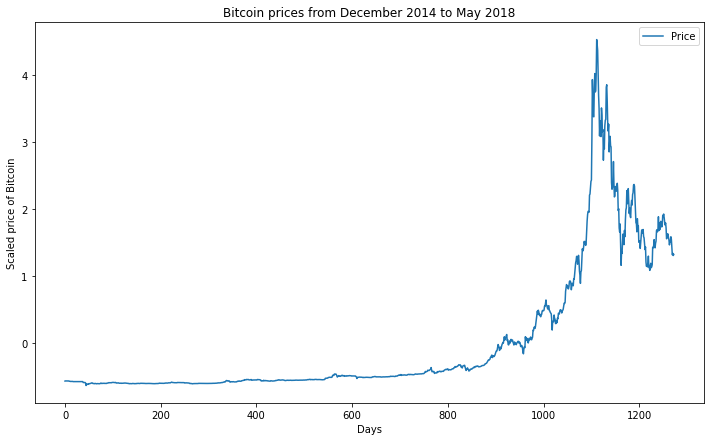

In [4]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfLimpo.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [5]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [6]:
def model_evaluation(model,x_test,y_test):
  y_pred = model.predict(x_test)
  y_testNorm = scaler.fit_transform(y_test.reshape(-1, 1))
  y_predNorm = scaler.fit_transform(y_pred.reshape(-1, 1))

  mse = sk.mean_squared_error(y_testNorm, y_predNorm)
  rmse = np.sqrt(mse)
  mae = sk.mean_absolute_error(y_testNorm, y_predNorm)
  r2 = sk.r2_score(y_testNorm, y_predNorm)

  # Print the evaluation metrics
  print("Mean squared error: ", mse)
  print("Root mean squared error: ", rmse)
  print("Mean absolute error: ", mae)
  print("R2 score: ", r2)

  # Plot the predictions and actual values
  plt.plot(y_testNorm, label='Actual')
  plt.plot(y_predNorm, label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [7]:
def plot_history(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

Modelo 1: window_size = 7

In [8]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 7, 1)
y_train size: (886, 1)
X_val size: (127, 7, 1)
y_val size: (127, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)


In [9]:
#Configurações globais para todos os modelos
early_stop_val = EarlyStopping(monitor= 'val_loss',  patience= 4)
early_stop_train = EarlyStopping(monitor = 'loss',patience = 8)

Epoch 1/250
111/111 [==============================] - 4s 12ms/step - loss: 0.0476 - val_loss: 0.1205
Epoch 2/250
111/111 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.1036
Epoch 3/250
111/111 [==============================] - 1s 6ms/step - loss: 9.2421e-04 - val_loss: 0.0856
Epoch 4/250
111/111 [==============================] - 1s 5ms/step - loss: 6.0916e-04 - val_loss: 0.0687
Epoch 5/250
111/111 [==============================] - 0s 4ms/step - loss: 3.7088e-04 - val_loss: 0.0551
Epoch 6/250
111/111 [==============================] - 0s 4ms/step - loss: 2.0444e-04 - val_loss: 0.0451
Epoch 7/250
111/111 [==============================] - 0s 4ms/step - loss: 1.1365e-04 - val_loss: 0.0383
Epoch 8/250
111/111 [==============================] - 0s 4ms/step - loss: 7.5258e-05 - val_loss: 0.0343
Epoch 9/250
111/111 [==============================] - 1s 4ms/step - loss: 6.5676e-05 - val_loss: 0.0325
Epoch 10/250
111/111 [==============================] - 0s 4ms

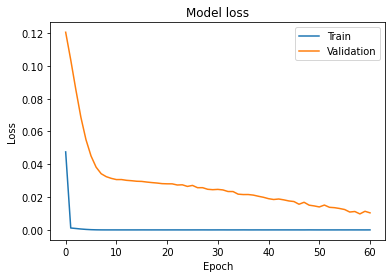

9/9 [==============================] - 0s 3ms/step
Mean squared error:  0.31980694929840564
Root mean squared error:  0.5655147648809937
Mean absolute error:  0.44511280309649964
R2 score:  0.6801930507015943


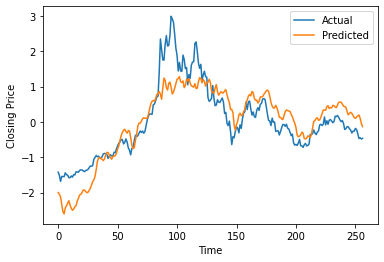

In [18]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_val])
plot_history(history)
model_evaluation(model,x_test,y_test)

Modelo 2: window_size = 7

Epoch 1/250
111/111 [==============================] - 4s 16ms/step - loss: 0.2854 - val_loss: 0.0722
Epoch 2/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2787 - val_loss: 0.0715
Epoch 3/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2721 - val_loss: 0.0708
Epoch 4/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2656 - val_loss: 0.0701
Epoch 5/250
111/111 [==============================] - 2s 16ms/step - loss: 0.2592 - val_loss: 0.0695
Epoch 6/250
111/111 [==============================] - 2s 18ms/step - loss: 0.2528 - val_loss: 0.0688
Epoch 7/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2466 - val_loss: 0.0682
Epoch 8/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2405 - val_loss: 0.0675
Epoch 9/250
111/111 [==============================] - 1s 12ms/step - loss: 0.2344 - val_loss: 0.0669
Epoch 10/250
111/111 [==============================] - 1s 11ms/step - loss: 0.228

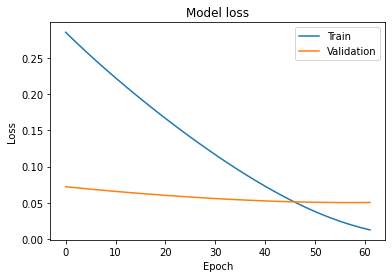

8/8 [==============================] - 1s 8ms/step
Mean squared error:  0.24244078245386397
Root mean squared error:  0.49238276011032717
Mean absolute error:  0.38359823549709243
R2 score:  0.7575592175461361


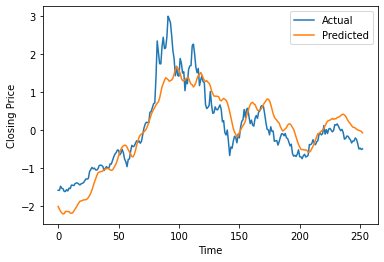

In [11]:
model2 = Sequential()
model2.add(LSTM(150, input_shape=(window_size, 1)))
model2.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model2.compile(loss='mean_squared_error', optimizer= optimizer)

history = model2.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model2,x_test,y_test)

Modelo 3: window_size = 5

In [12]:
#Criando datasets usando uma janela com 5 pontos
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 5, 1)
y_train size: (886, 1)
X_val size: (127, 5, 1)
y_val size: (127, 1)
X_test size: (255, 5, 1)
y_test size: (255, 1)


Epoch 1/250
111/111 [==============================] - 4s 16ms/step - loss: 0.2446 - val_loss: 0.0629
Epoch 2/250
111/111 [==============================] - 1s 8ms/step - loss: 0.2331 - val_loss: 0.0624
Epoch 3/250
111/111 [==============================] - 1s 7ms/step - loss: 0.2220 - val_loss: 0.0618
Epoch 4/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2111 - val_loss: 0.0613
Epoch 5/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2006 - val_loss: 0.0609
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1904 - val_loss: 0.0605
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1804 - val_loss: 0.0601
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1707 - val_loss: 0.0598
Epoch 9/250
111/111 [==============================] - 1s 5ms/step - loss: 0.1612 - val_loss: 0.0595
Epoch 10/250
111/111 [==============================] - 1s 6ms/step - loss: 0.1519 - val_l

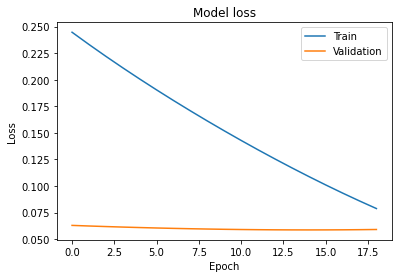

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.37515469798319917
Root mean squared error:  0.6124987330461992
Mean absolute error:  0.48420545432775874
R2 score:  0.624845302016801


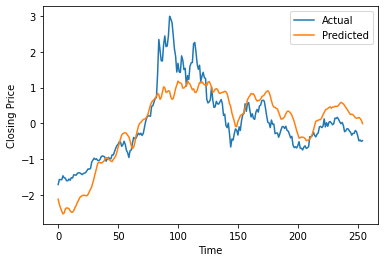

In [13]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(window_size, 1)))
model3.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model3.compile(loss='mean_squared_error', optimizer= optimizer)

history = model3.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model3,x_test,y_test)

modelo 4: window_size = 5

Epoch 1/250
111/111 [==============================] - 4s 14ms/step - loss: 0.2569 - val_loss: 0.0641
Epoch 2/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2519 - val_loss: 0.0636
Epoch 3/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2468 - val_loss: 0.0631
Epoch 4/250
111/111 [==============================] - 2s 15ms/step - loss: 0.2419 - val_loss: 0.0627
Epoch 5/250
111/111 [==============================] - 1s 11ms/step - loss: 0.2370 - val_loss: 0.0622
Epoch 6/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2322 - val_loss: 0.0618
Epoch 7/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2275 - val_loss: 0.0614
Epoch 8/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2228 - val_loss: 0.0610
Epoch 9/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2182 - val_loss: 0.0605
Epoch 10/250
111/111 [==============================] - 1s 9ms/step - loss: 0.2136 - va

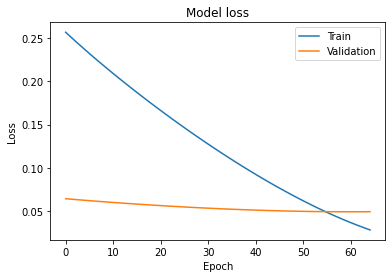

8/8 [==============================] - 0s 5ms/step
Mean squared error:  0.14508949886892156
Root mean squared error:  0.3809061549370416
Mean absolute error:  0.2933640427869569
R2 score:  0.8549105011310785


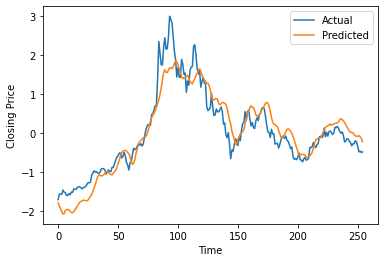

In [14]:
model4 = Sequential()
model4.add(LSTM(150, input_shape=(window_size, 1)))
model4.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model4.compile(loss='mean_squared_error', optimizer= optimizer)

history = model4.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model4,x_test,y_test)

Modelo 5: window_size = 3

In [15]:
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_val, x_test = np.array(x[:886]), np.array(x[886:1013]), np.array(x[1013:])
y_train, y_val, y_test = np.array(y[:886]), np.array(y[886:1013]), np.array(y[1013:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(x_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (886, 3, 1)
y_train size: (886, 1)
X_val size: (127, 3, 1)
y_val size: (127, 1)
X_test size: (257, 3, 1)
y_test size: (257, 1)


Epoch 1/250
111/111 [==============================] - 4s 9ms/step - loss: 0.2961 - val_loss: 0.0710
Epoch 2/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2880 - val_loss: 0.0708
Epoch 3/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2800 - val_loss: 0.0707
Epoch 4/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2721 - val_loss: 0.0705
Epoch 5/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2643 - val_loss: 0.0704
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2567 - val_loss: 0.0703
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2491 - val_loss: 0.0702
Epoch 8/250
111/111 [==============================] - 1s 6ms/step - loss: 0.2417 - val_loss: 0.0701
Epoch 9/250
111/111 [==============================] - 0s 4ms/step - loss: 0.2343 - val_loss: 0.0701
Epoch 10/250
111/111 [==============================] - 1s 5ms/step - loss: 0.2271 - val_lo

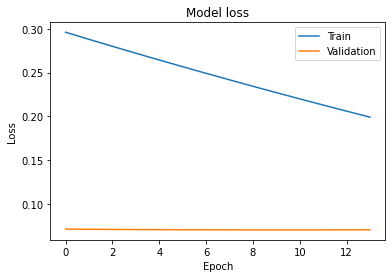

9/9 [==============================] - 0s 3ms/step
Mean squared error:  0.09110090866241889
Root mean squared error:  0.3018292707184293
Mean absolute error:  0.22862375635056162
R2 score:  0.9088990913375811


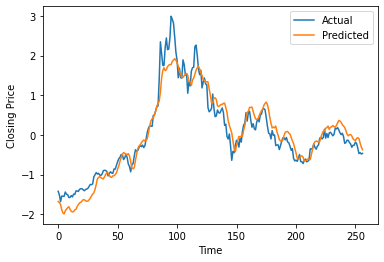

In [16]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(window_size, 1)))
model5.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000005)
model5.compile(loss='mean_squared_error', optimizer= optimizer)

history = model5.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model5,x_test,y_test)

Modelo 6: window_size = 3

Epoch 1/250
111/111 [==============================] - 3s 12ms/step - loss: 0.3288 - val_loss: 0.0788
Epoch 2/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3257 - val_loss: 0.0786
Epoch 3/250
111/111 [==============================] - 1s 10ms/step - loss: 0.3226 - val_loss: 0.0784
Epoch 4/250
111/111 [==============================] - 1s 10ms/step - loss: 0.3195 - val_loss: 0.0782
Epoch 5/250
111/111 [==============================] - 1s 9ms/step - loss: 0.3165 - val_loss: 0.0780
Epoch 6/250
111/111 [==============================] - 1s 6ms/step - loss: 0.3135 - val_loss: 0.0779
Epoch 7/250
111/111 [==============================] - 1s 6ms/step - loss: 0.3105 - val_loss: 0.0777
Epoch 8/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3075 - val_loss: 0.0775
Epoch 9/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3045 - val_loss: 0.0773
Epoch 10/250
111/111 [==============================] - 1s 7ms/step - loss: 0.3016 - val

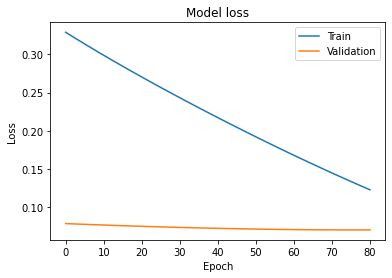

9/9 [==============================] - 0s 3ms/step
Mean squared error:  0.19030958963091732
Root mean squared error:  0.43624487347236224
Mean absolute error:  0.3253518570882563
R2 score:  0.8096904103690827


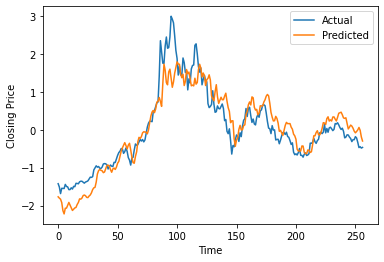

In [17]:
model6 = Sequential()
model6.add(LSTM(150, input_shape=(window_size, 1)))
model6.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate = 0.000001)
model6.compile(loss='mean_squared_error', optimizer= optimizer)

history = model6.fit(x_train, y_train, epochs=250, batch_size=8,validation_data = (x_val,y_val),callbacks=[early_stop_val,early_stop_train])
plot_history(history)
model_evaluation(model6,x_test,y_test)